In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold, cross_val_score 

In [2]:
bikes = pd.read_csv('bikes.csv')
bikes

,temperature,humidity,windspeed,rentals
0,46.716528,0.815969,13.669663,985
1,48.350239,0.800497,15.199782,801
2,34.212394,0.592097,13.247558,1349
3,34.520000,0.623196,11.687963,1562
4,36.800562,0.624643,13.148281,1600
...,...,...,...,...
726,39.102528,0.482493,10.801229,2114
727,39.031972,0.480433,8.996301,3095
728,39.031972,0.717730,11.829425,1341
729,39.243472,0.523039,12.805314,1796


In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  731 non-null    float64
 1   humidity     731 non-null    float64
 2   windspeed    731 non-null    float64
 3   rentals      731 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 23.0 KB


array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'rentals'}>]], dtype=object)

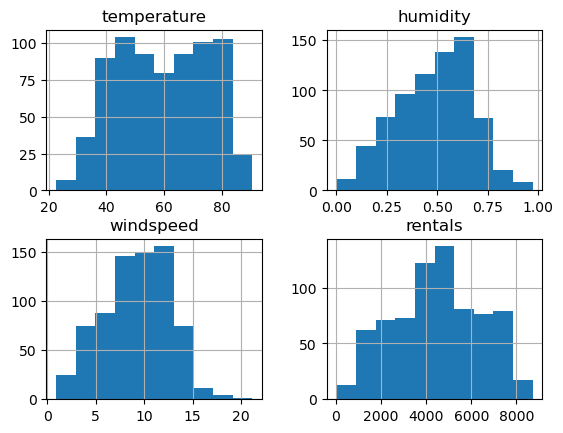

In [4]:

bikes.hist()



temperature       Axes(0.125,0.11;0.168478x0.77)
humidity       Axes(0.327174,0.11;0.168478x0.77)
windspeed      Axes(0.529348,0.11;0.168478x0.77)
rentals        Axes(0.731522,0.11;0.168478x0.77)
dtype: object

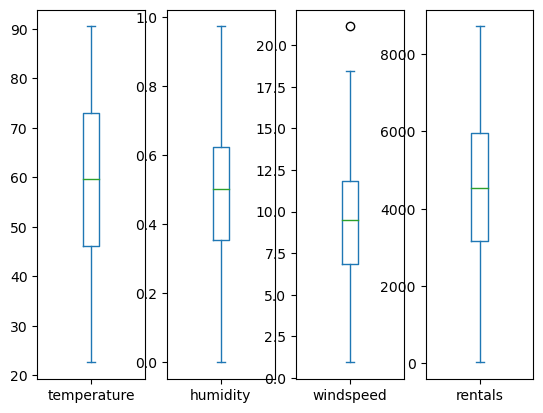

In [5]:
bikes.plot(kind= 'box', subplots= True)

In [6]:
bikes.isnull().sum()


temperature    0
humidity       0
windspeed      0
rentals        0
dtype: int64

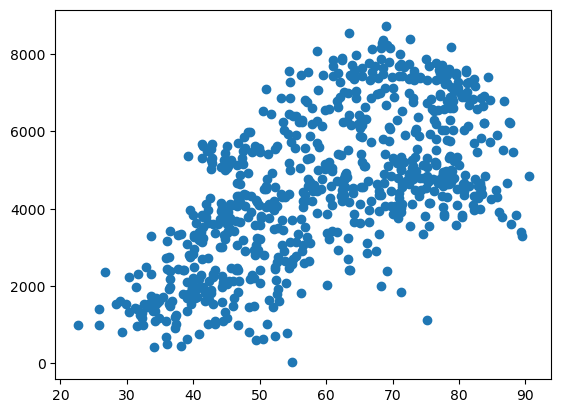

In [7]:
x= bikes['temperature']
y= bikes['rentals']

plt.scatter(x,y)
plt.show()

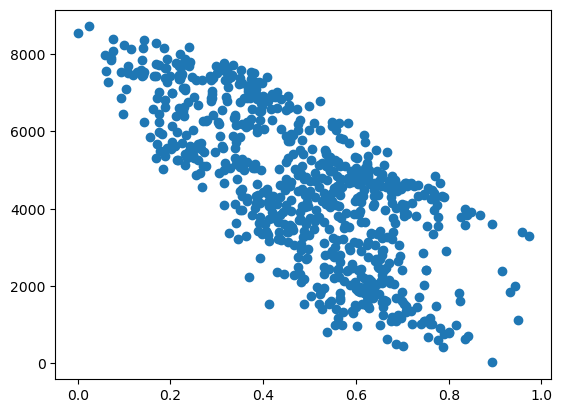

In [8]:
x= bikes['humidity']
y= bikes['rentals']

plt.scatter(x,y)
plt.show()

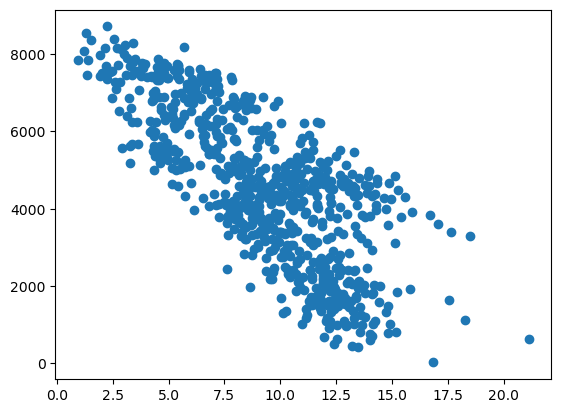

In [9]:
x= bikes['windspeed']
y= bikes['rentals']

plt.scatter(x,y)
plt.show()

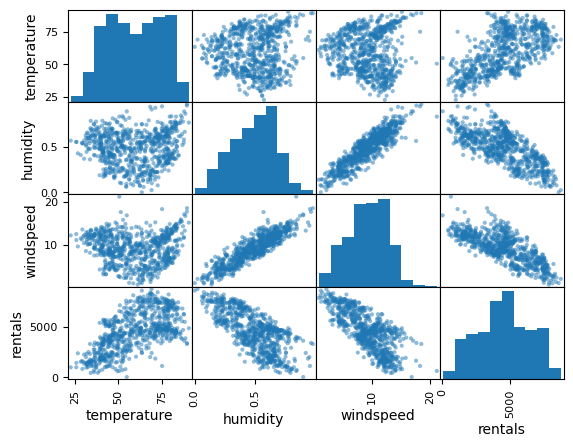

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(bikes)
plt.show()

In [11]:
y= bikes[['rentals']]
y

,rentals
0,985
1,801
2,1349
3,1562
4,1600
...,...
726,2114
727,3095
728,1341
729,1796


In [12]:
x = bikes[['temperature', 'humidity', 'windspeed']]
x

,temperature,humidity,windspeed
0,46.716528,0.815969,13.669663
1,48.350239,0.800497,15.199782
2,34.212394,0.592097,13.247558
3,34.520000,0.623196,11.687963
4,36.800562,0.624643,13.148281
...,...,...,...
726,39.102528,0.482493,10.801229
727,39.031972,0.480433,8.996301
728,39.031972,0.717730,11.829425
729,39.243472,0.523039,12.805314


In [13]:
correlation_matrix = x.corr()
print(correlation_matrix)

             temperature  humidity  windspeed
temperature     1.000000  0.055479  -0.024560
humidity        0.055479  1.000000   0.898802
windspeed      -0.024560  0.898802   1.000000


## Normalizing the features

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x.head(3)

,temperature,humidity,windspeed
0,-0.826662,1.775789,1.311850
1,-0.721095,1.692287,1.764883
2,-1.634657,0.567549,1.186875


<Axes: >

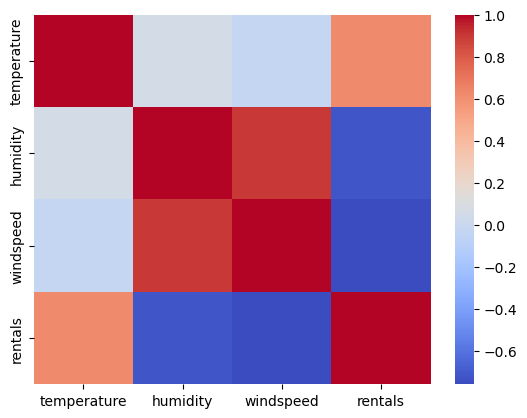

In [15]:
correlation= bikes.corr()
custom_cmap = 'coolwarm'
sns.heatmap(correlation, cmap= custom_cmap)


In [16]:
correlation 

,temperature,humidity,windspeed,rentals
temperature,1.000000,0.055479,-0.024560,0.627494
humidity,0.055479,1.000000,0.898802,-0.717508
windspeed,-0.024560,0.898802,1.000000,-0.758180
rentals,0.627494,-0.717508,-0.758180,1.000000


## Apply Linear Regression with all features

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

In [18]:


model=LinearRegression()
result = cross_val_score(model, x_train, y_train, cv=3, scoring='r2')
result


array([0.98325372, 0.98122354, 0.98344712])

In [19]:
print('Average score:',result.mean())

Average score: 0.982641462455192


In [20]:
model= LinearRegression().fit(x_train, y_train)

In [21]:
model.intercept_

array([4503.49380488])

In [22]:
model.coef_

array([[1241.23682892, -867.58527537, -655.48309778]])

In [23]:
model.score(x_test, y_test)

0.983748660814203

In [24]:
y_pred = model.predict(x_test)

In [25]:
y_test_1d = y_test.values.reshape(-1)
y_pred_1d = y_pred.reshape(-1)

# Create a DataFrame with y_pred and y_test
result_df = pd.DataFrame({'Actual': y_test_1d, 'Predicted': y_pred_1d})

# Display the DataFrame
result_df

,Actual,Predicted
0,5870,6241.888150
1,3598,3620.382284
2,5362,4762.425771
3,7421,7853.621066
4,4758,4756.892619
...,...,...
178,8294,7828.578041
179,3663,3584.832811
180,5687,5551.789835
181,3649,3515.010123


In [26]:
mean_absolute_error(y_test, y_pred)

193.8934408361411

In [27]:
model.score(x_test, y_test)


0.983748660814203

In [28]:



r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.983748660814203


## Removing humidity from the model

In [29]:
x_h= x.drop(['humidity'], axis=1)
x_h.head(2)

,temperature,windspeed
0,-0.826662,1.311850
1,-0.721095,1.764883


In [30]:
x_h_train, x_h_test, y_train, y_test = train_test_split(x_h, y, test_size=0.2,  random_state=10)

In [31]:
result_h = cross_val_score(model, x_h_train, y_train, cv=3, scoring='r2')
result_h

array([0.9424426 , 0.94622586, 0.94125653])

In [32]:
model= LinearRegression().fit(x_h_train, y_train)
model.score(x_h_test, y_test)
y_h_pred = model.predict(x_h_test)

y_test_1d = y_test.values.reshape(-1)
y_pred_1d = y_h_pred.reshape(-1)

# Create a DataFrame with y_pred and y_test
result_df_h= pd.DataFrame({'Actual': y_test_1d, 'Predicted': y_pred_1d})

# Display the DataFrame
result_df_h

,Actual,Predicted
0,5870,6464.741286
1,3598,3714.364991
2,5362,4552.854669
3,7421,7163.539472
4,4758,4200.799430
...,...,...
142,5008,5457.702806
143,4539,4710.395042
144,7261,7225.512480
145,2935,3267.854637


In [33]:
model.score(x_h_test, y_test)

0.9518921935830591

In [34]:
mean_absolute_error(y_test, y_h_pred)

354.0786813097057

In [35]:
model.coef_

array([[ 1163.20060299, -1436.50079067]])

### Dropping windspeed from the model

In [36]:
x_w= x.drop(['windspeed'], axis=1)

In [37]:
x_w.head(2)

,temperature,humidity
0,-0.826662,1.775789
1,-0.721095,1.692287


In [38]:
x_w_train, x_w_test, y_train, y_test = train_test_split(x_w, y, test_size=0.2, random_state=10)

In [39]:
result_w = cross_val_score(model, x_w_train, y_train, cv=3, scoring='r2')
result_w

array([0.96356792, 0.95882292, 0.95966287])

In [40]:
model.fit(x_w_train, y_train)
model.score(x_w_test, y_test)

0.961890689317705

In [41]:
y_w_pred = model.predict(x_w_test)

y_test_1d = y_test.values.reshape(-1)
y_pred_1d = y_w_pred.reshape(-1)

# Create a DataFrame with y_pred and y_test
result_df_w= pd.DataFrame({'Actual': y_test_1d, 'Predicted': y_pred_1d})

# Display the DataFrame
result_df_w

,Actual,Predicted
0,5870,6022.205799
1,3598,3516.550089
2,5362,5031.184541
3,7421,8195.575872
4,4758,5275.130092
...,...,...
142,5008,4627.216424
143,4539,4380.490989
144,7261,7039.358508
145,2935,3687.052576


In [42]:
mean_absolute_error(y_test, y_w_pred)

297.8432848614159

Removing either of the correlated features from model result in reduction of the model strength. 